# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0']
filenames1 = ['ccbar0','phi0']
filenames1 = ['ccbar_20M','phi0']
filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,'ccbar_new00'
filenames2 = ['photon_100M_v0','photon_100M_v1']
filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']
filenames2 = ['dalitz_new00']

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]
    
    data['sdphi2'] = data['sdphi2'] + 10
    data['sdphi3'] = data['sdphi3'] + 10

    data.loc[data['sdphi2'] > 1, 'sdphi2'] = 1
    data.loc[data['sdphi3'] > 1, 'sdphi3'] = 1

    data.head()

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
data.head()

,NBDThit,Pt,Phi0,The0,PhiDC,ZDC,Alpha,Ecore,Centrality,Charge,...,SecondHitPhiL2,SecondHitTheR2,SecondHitTheL2,sdphi3,sdthe3,IsTrue3,SecondHitPhiR3,SecondHitPhiL3,SecondHitTheR3,SecondHitTheL3
3188442,3,0.820801,2.099609,1.712891,2.349609,-31.359375,-0.127319,0.661133,63,1,...,25.296875,2.621094,1.852539,1.0,-0.414551,1,43.40625,30.015625,3.492188,1.791992
4902090,3,0.699219,3.082031,1.279297,3.384766,65.437500,-0.156616,0.776855,85,1,...,-99.000000,-53.843750,-99.000000,0.0,-10.000000,0,-99.00000,1.468750,-99.000000,0.231323
1166816,1,1.197266,3.794922,1.772461,3.621094,-44.750000,0.090332,1.133789,87,-1,...,-99.000000,-99.000000,-99.000000,0.0,-10.000000,0,-99.00000,-99.000000,-99.000000,-99.000000
722074,3,1.040039,3.177734,1.476562,3.373047,20.921875,-0.097046,0.966797,51,1,...,-99.000000,15.062500,-99.000000,1.0,1.373047,1,-22.25000,-99.000000,-20.031250,-99.000000
1713046,6,0.591797,3.121094,1.440430,2.775391,29.078125,0.172363,0.609375,32,-1,...,1.224609,-0.721191,-0.531738,0.0,-10.000000,0,-99.00000,1.666016,-99.000000,-0.722656


In [5]:
print(data.size, data.shape)

827764896 (17245102, 48)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi0','sdphi1','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])

In [7]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'Alpha', 'Ecore','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


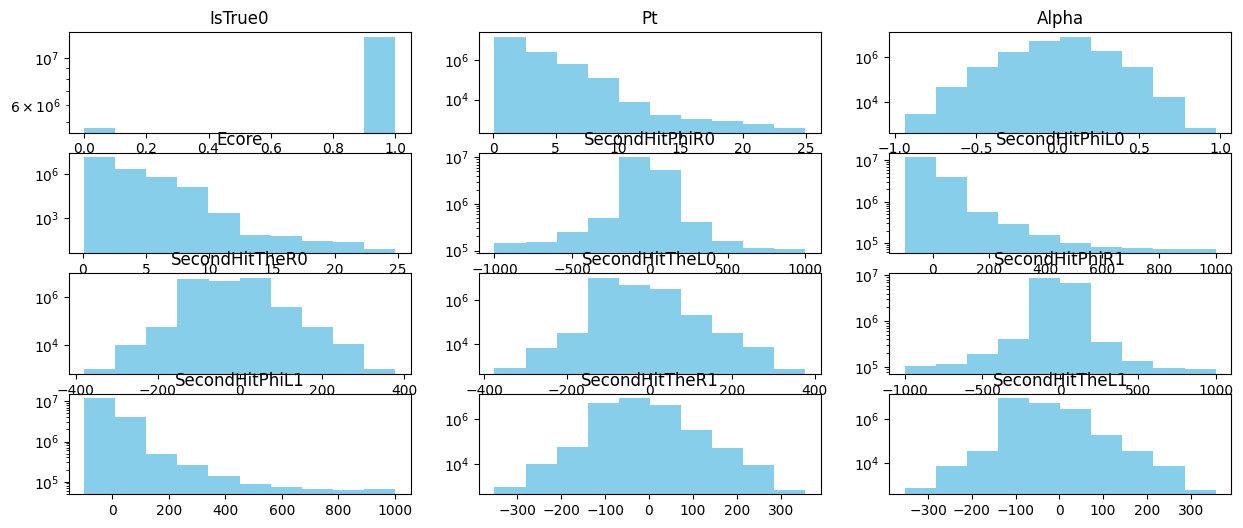

In [8]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [9]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [10]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

5748367 11496735


In [11]:
X_test

,NBDThit,Pt,Alpha,Ecore,Centrality,Charge,Arm,reconpt,SecondHitPhiR0,SecondHitPhiL0,...,sdphi2,SecondHitPhiR2,SecondHitPhiL2,SecondHitTheR2,SecondHitTheL2,sdphi3,SecondHitPhiR3,SecondHitPhiL3,SecondHitTheR3,SecondHitTheL3
4684416,3,0.748535,0.135132,0.729980,39,-1,1,0.763672,-99.000000,-99.000000,...,1.0,-27.234375,-99.0,0.869141,-99.0,0.0,-99.000000,-99.00000,-99.000000,-99.0000
3810833,5,1.221680,-0.082947,1.209961,41,1,0,1.141602,-99.000000,-99.000000,...,1.0,-99.000000,-99.0,-99.000000,-99.0,1.0,0.000000,-99.00000,3.085938,-99.0000
5686162,1,0.642090,-0.173218,0.693359,80,1,0,0.618164,-99.000000,-99.000000,...,1.0,-99.000000,-99.0,-99.000000,-99.0,0.0,-99.000000,-99.00000,-99.000000,-99.0000
2151837,1,0.305664,-0.338379,0.371338,69,1,1,0.272949,90.687500,90.562500,...,0.0,-99.000000,-99.0,-99.000000,-99.0,1.0,-99.000000,-99.00000,-99.000000,-99.0000
2380632,1,4.257812,0.026077,3.816406,37,-1,0,3.431641,-99.000000,-99.000000,...,1.0,-99.000000,-99.0,-99.000000,-99.0,0.0,-99.000000,56.65625,-99.000000,13.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183433,1,0.477051,0.217773,0.400879,57,-1,1,0.580078,-12.851562,-99.000000,...,1.0,-29.500000,-99.0,-7.609375,-99.0,0.0,-99.000000,-99.00000,-99.000000,-99.0000
1945173,1,2.884766,0.038544,2.888672,43,-1,1,3.078125,-298.250000,-99.000000,...,0.0,-99.000000,-99.0,-99.000000,-99.0,1.0,-272.750000,-99.00000,-63.750000,-99.0000
2775661,3,4.046875,-0.029343,5.019531,79,1,1,3.472656,41.531250,41.562500,...,0.0,-99.000000,-99.0,-99.000000,-99.0,1.0,-1.973633,-99.00000,6.160156,-99.0000
740689,1,0.427979,-0.254639,0.400879,69,1,0,0.372559,-99.000000,-99.000000,...,1.0,-99.000000,-99.0,-99.000000,-99.0,0.0,-99.000000,-99.00000,-99.000000,-99.0000


In [12]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [13]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44   1563918
           1       1.00      0.05      0.09   4184449

    accuracy                           0.31   5748367
   macro avg       0.64      0.52      0.27   5748367
weighted avg       0.80      0.31      0.19   5748367

confusion matrix
[[1562922     996]
 [3984950  199499]]


In [14]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.01, 0.2],
    "min_samples_split": [0.01, 0.2],
    "max_depth":[12],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[20]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

/home/yoren/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


точность:  0.3377303502020661
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 20}
0.34276447550261263
time of execution (sec) 1136.4518978595734


# Cross Validation

In [15]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45   1563918
           1       1.00      0.09      0.17   4184449

    accuracy                           0.34   5748367
   macro avg       0.65      0.55      0.31   5748367
weighted avg       0.81      0.34      0.24   5748367



In [16]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.01319999764947961
roc auc: 0.9399912213394734
f1 score: 0.8950319037746345


Text(0.5, 1.0, 'ROC AUC Curve')

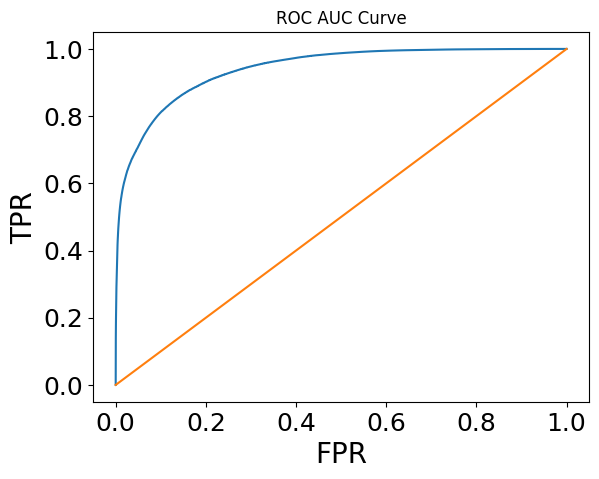

In [17]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [18]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.5852999722212535


In [58]:
i = 1100000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.959 0.3523
0.008981671861178077 0.33800301550337036 0.9594520090936703


In [20]:
print(sum(predicted),len(predicted))

377724 5748367


In [21]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.0088070267903928


In [22]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Dalitz.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [23]:
mycute,mycuth, AIcute, AIcuth = 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>4000000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centrality, pt, IsTrue0 = row['Centrality'], row['Pt'], row['IsTrue0']

    if pt<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if sdphi0>sigma_veto and ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if proba_loc[counter][1]>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [24]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

2492449 2364687997.0 1.0 1.0 0.939 0.251 0.268 0.284


In [25]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

3.736 0.939 0.251 112


In [26]:
%run input/Format.ipynb

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


5164.0 13442.0


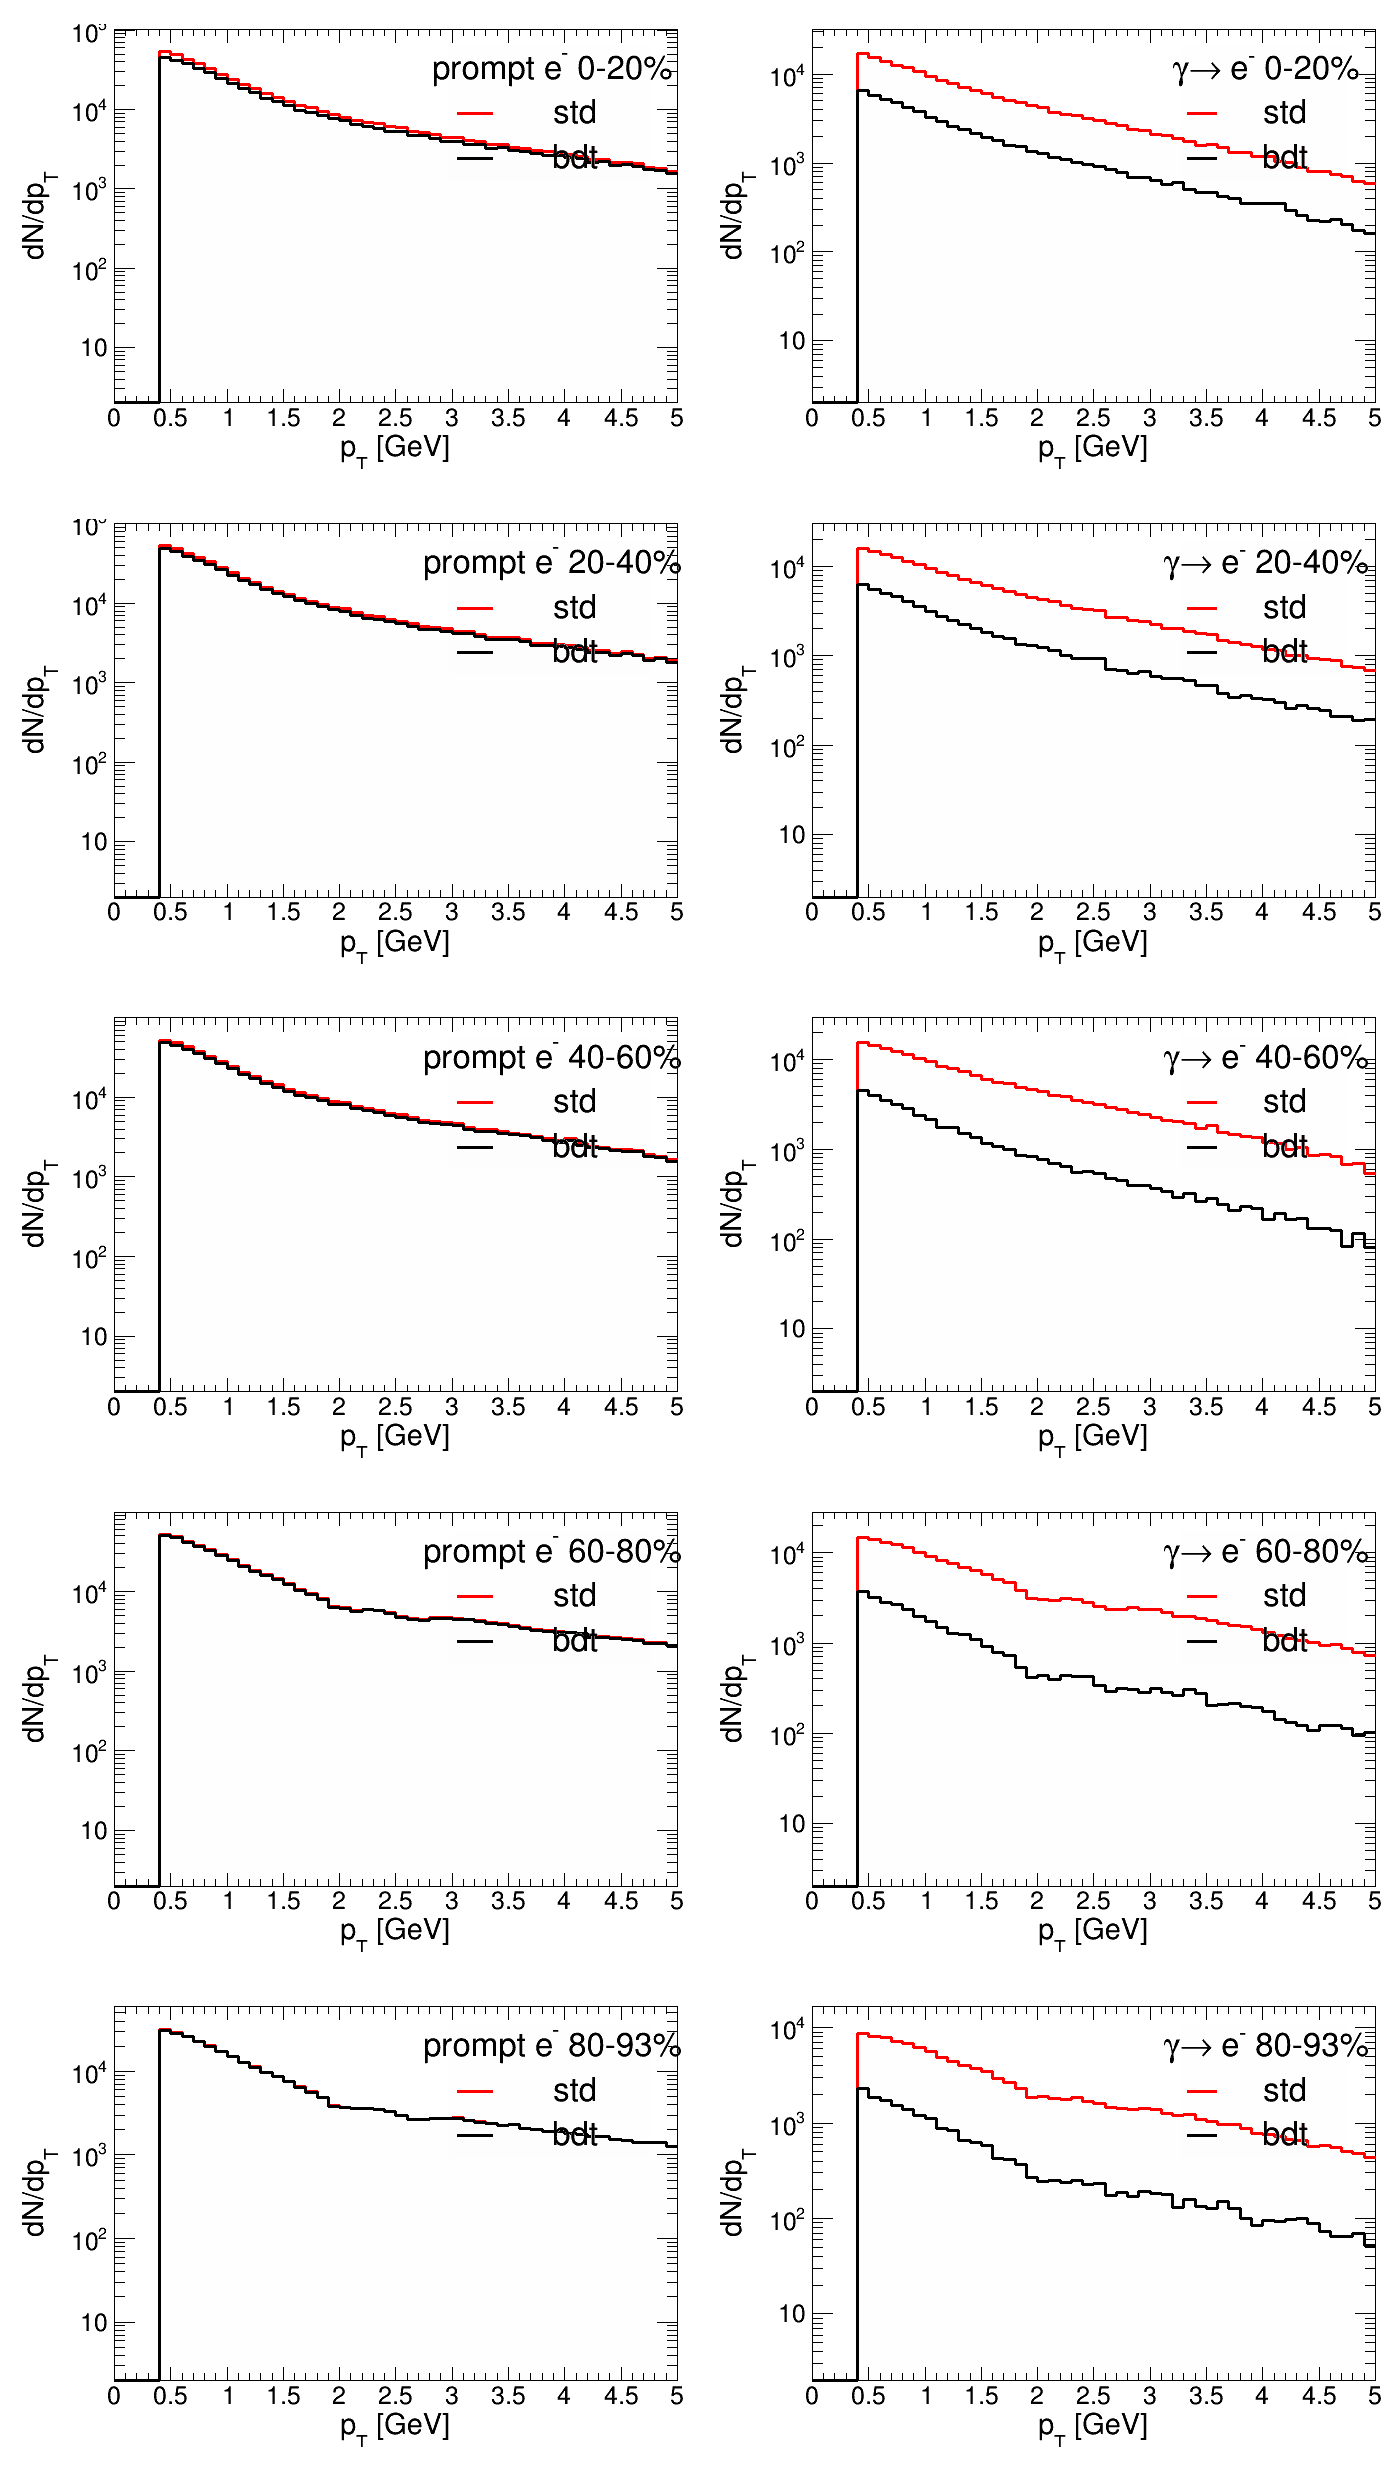

In [27]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(3)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

In [28]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [29]:
import pickle
with open('output/bdt_dalitz.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[0 0 0 0 0 0 0 0 0 0]


In [30]:
import pickle
# load
with open('output/bdt_dalitz.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[0 0 0 0 0 0 0 0 0 0]


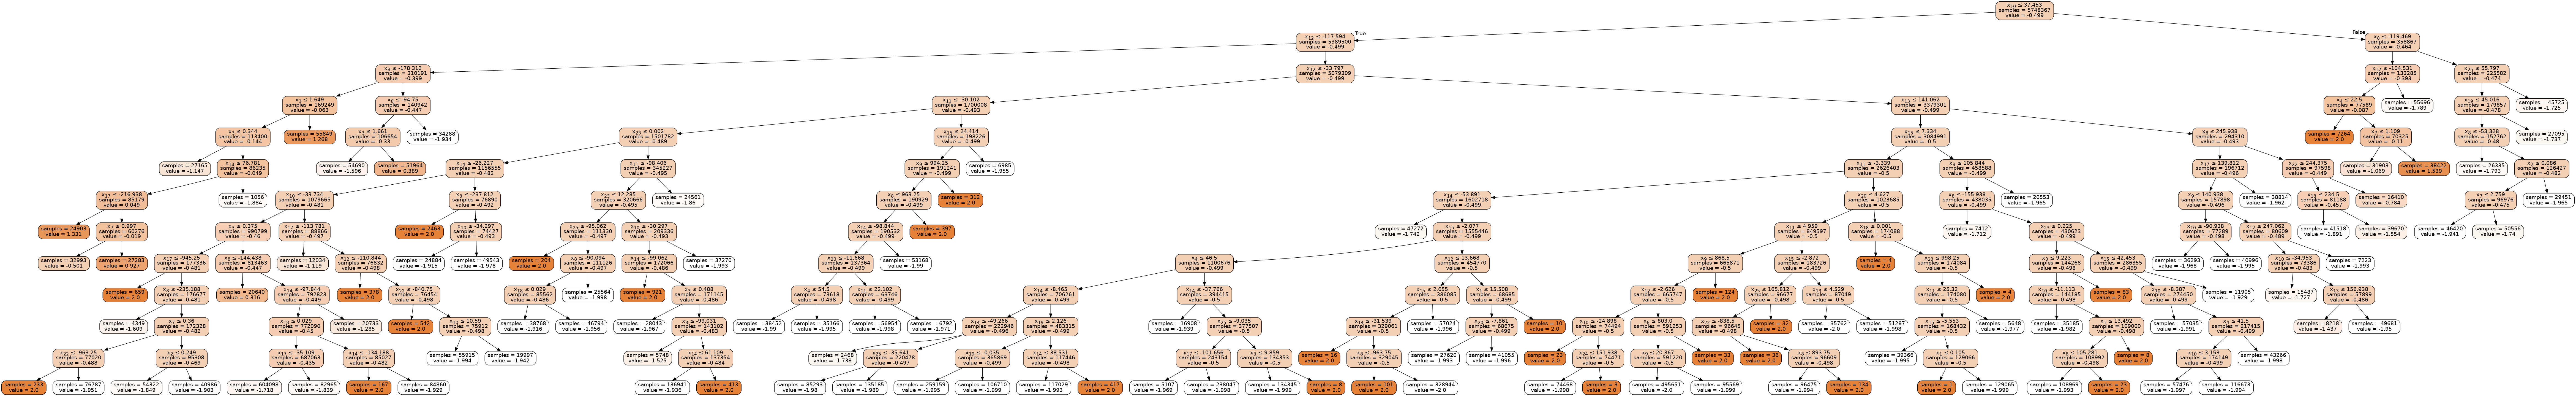

In [31]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [32]:
clf2.predict(kek_data[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [33]:
clf2.predict_proba(kek_data[0:100])

array([[0.99119297, 0.00880703],
       [0.98223539, 0.01776461],
       [0.91616648, 0.08383352],
       [0.94893291, 0.05106709],
       [0.99080325, 0.00919675],
       [0.9272978 , 0.0727022 ],
       [0.99134611, 0.00865389],
       [0.99087116, 0.00912884],
       [0.98957103, 0.01042897],
       [0.99130324, 0.00869676],
       [0.91516187, 0.08483813],
       [0.99084515, 0.00915485],
       [0.99130181, 0.00869819],
       [0.99137512, 0.00862488],
       [0.99063485, 0.00936515],
       [0.11449658, 0.88550342],
       [0.99068066, 0.00931934],
       [0.92467133, 0.07532867],
       [0.99018849, 0.00981151],
       [0.99112378, 0.00887622],
       [0.49202087, 0.50797913],
       [0.96989974, 0.03010026],
       [0.83635548, 0.16364452],
       [0.14194235, 0.85805765],
       [0.99077009, 0.00922991],
       [0.98935875, 0.01064125],
       [0.99095348, 0.00904652],
       [0.92467133, 0.07532867],
       [0.98971329, 0.01028671],
       [0.98980306, 0.01019694],
       [0.

In [34]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 20}


In [35]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.99130324, 0.00869676],
       [0.91516187, 0.08483813],
       [0.99084515, 0.00915485],
       [0.99130181, 0.00869819],
       [0.99137512, 0.00862488],
       [0.99063485, 0.00936515],
       [0.11449658, 0.88550342],
       [0.99068066, 0.00931934],
       [0.92467133, 0.07532867],
       [0.99018849, 0.00981151],
       [0.99112378, 0.00887622]])

In [36]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[-2.69269912 -1.81725734 -2.68715031 -2.6929222  -2.69342203 -2.68261311
  0.81537128 -2.67462102 -1.98931388 -2.67338902]
[-7.82455358 -7.11987394 -7.82455358 -7.11987394 -7.82114338 -8.01826271
 -2.4044834  -7.49086822 -7.11987394 -7.27513597 -7.11987394]
[0.06340554 0.1397633  0.06373586 0.0633923  0.06336262 0.06400715
 0.69325291 0.06448763 0.12032947 0.06456199]


In [37]:
best_gbc = clf2.best_estimator_

In [38]:
n_estim = best_gbc.n_estimators

In [39]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[-4.73606955 -2.37835589 -4.68427472 -4.73590456 -4.74444188 -4.66135066
  2.04561141 -4.66630035 -2.5075775  -4.61433937]
[0.00869676 0.08483813 0.00915485 0.00869819 0.00862488 0.00936515
 0.88550342 0.00931934 0.07532867 0.00981151]
0.2


In [40]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [41]:
print(log_odds_predictions)

[[-1.9996409076132409, -1.7179256754425638, -1.9979570660681198, -1.9997812884713047, -1.9997812884713047, -1.9945843285443128, 0.38949450347270137, -1.9886197025880028, -1.7179256754425638, -1.9938075419984518], [-1.6701104545785634, -1.4001993208769192, -1.6687694491729526, -1.6693574456396385, -1.6701104545785634, -1.6679072100413999, -1.3019703199963861, -1.666940918227217, -1.4001993208769192, -1.662974931569561], [-1.4792587066598115, -1.1981634622459287, -1.4767431117650036, -1.4797625395144716, -1.4797625395144716, -1.4797155411422482, -1.1530131559462897, -1.4721494445589645, -1.1981634622459287, -1.4714595027619626], [-1.3565917069744255, -1.040840946671214, -1.3557847418620639, -1.3565917069744255, -1.3565917069744255, -1.341390366855278, -1.1253357456038007, -1.3456568671434639, -1.040840946671214, -1.3483289319347642], [-1.2715064803485858, -0.9112370239441596, -1.2715064803485858, -1.2715064803485858, -1.2715064803485858, -1.2715064803485858, 2.04164820264491, -1.25793958

In [42]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 -2.692699115346128
[-4.73606955 -2.37835589 -4.68427472 -4.73590456 -4.74444188 -4.66135066
  2.04561141 -4.66630035 -2.5075775  -4.61433937]


In [43]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

20
1
[[-1.9996409076132409, -1.6701104545785634, -1.4792587066598115, -1.3565917069744255, -1.2715064803485858, -1.2093650910012934, -1.165057535377781, -1.1286972717153465, -1.1034525801769692, -1.0798148422846225, -1.0635380777258383, -1.0528703424962516, -1.0398386431517306, -1.0304728291876224, -1.0257800688968093, -1.0170156011636604, -1.0099025300331117, -1.0056078555613674, -0.9864464672755783, -0.9853797488226519], [-1.7179256754425638, -1.4001993208769192, -1.1981634622459287, -1.040840946671214, -0.9112370239441596, -0.9875248792402637, -0.7340990090915845, -0.8091771751469647, 0.2218354060898887, -0.5089546065898725, -0.39477317166912, -0.4424739585025691, -0.3708319088622073, -0.30267427297018085, -0.4197626634538425, -0.19173971011305768, -0.3444967972130206, -0.49055353719901884, 0.12732749017287404, 0.024485771834213157], [-1.9979570660681198, -1.6687694491729526, -1.4767431117650036, -1.3557847418620639, -1.2715064803485858, -1.2093650910012934, -1.1516142290987577, -1.

In [44]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [45]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [46]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[10] <= 37.453125) if (x[12] > -117.59375) if (x[12] <= -33.796875) if (x[11] <= -30.1015625) if (x[23] <= 0.0022735595703125) if (x[14] <= -26.2265625) if (x[10] <= -33.734375) if (x[3] > 0.3746337890625) if (x[8] > -144.4375) if (x[14] <= -97.84375) if (x[18] <= 0.02854156494140625) if (x[17] <= -35.109375)   return -1.7179256754425636;  // | based on 604,098 samples
        if  (x[10] <= 37.453125) if (x[12] > -117.59375) if (x[12] > -33.796875) if (x[13] <= 141.0625) if (x[15] <= 7.333984375) if (x[11] > -3.3388671875) if (x[20] <= 4.626953125) if (x[11] <= 4.958984375) if (x[9] <= 868.5) if (x[12] > -2.6259765625) if (x[8] <= 803.0) if (x[9] <= 20.3671875)   return -1.9997812884713047;  // | based on 495,651 samples
        if  (x[10] <= 37.453125) if (x[12] > -117.59375) if (x[12] > -33.796875) if (x[13] <= 141.0625) if (x[15] <= 7.333984375) if (x[11] <= -3.3388671875) if (x[14] > -53.890625) if (x[15] > -2.0771484375) if (x[12] <= 13.6

In [47]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [48]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[10] <= 37.453125) and (x[12] > -117.59375) and (x[12] <= -33.796875) and (x[11] <= -30.1015625) and (x[23] <= 0.0022735595703125) and (x[14] <= -26.2265625) and (x[10] <= -33.734375) and (x[3] > 0.3746337890625) and (x[8] > -144.4375) and (x[14] <= -97.84375) and (x[18] <= 0.02854156494140625) and (x[17] <= -35.109375) :  return -1.7179256754425636  # | based on 604,098 samples
        if (x[10] <= 37.453125) and (x[12] > -117.59375) and (x[12] > -33.796875) and (x[13] <= 141.0625) and (x[15] <= 7.333984375) and (x[11] > -3.3388671875) and (x[20] <= 4.626953125) and (x[11] <= 4.958984375) and (x[9] <= 868.5) and (x[12] > -2.6259765625) and (x[8] <= 803.0) and (x[9] <= 20.3671875) :  return -1.9997812884713047  # | based on 495,651 samples
        if (x[10] <= 37.453125) and (x[12] > -117.59375) and (x[12] > -33.796875) and (x[13] <= 141.0625) and (x[15] <= 7.333984375) and (x[11] <= -3.3388671875) and (x[14] > -53.890625) and

In [49]:
def mytree(x,y):
    return 0

In [50]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [51]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [52]:
kek_data[9:19].values.tolist()[0][20]

1.6181640625

In [53]:
iestim = 19
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][15])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[-0.98537975]
14.8203125
[0]


In [54]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[[0.99130324 0.00869676]
 [0.91516187 0.08483813]
 [0.99084515 0.00915485]
 [0.99130181 0.00869819]
 [0.99137512 0.00862488]
 [0.99063485 0.00936515]
 [0.11449658 0.88550342]
 [0.99068066 0.00931934]
 [0.92467133 0.07532867]
 [0.99018849 0.00981151]]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [55]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'reconpt', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'sdphi2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'sdphi3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
26
